In [3]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

Setup Complete


<Figure size 1000x500 with 0 Axes>

# Quellen und Ursachen von Messunsicherheiten

Früher hat man statt *Abweichung* noch den Begriff *Messfehler* verwendet. Man dachte, dass man mit genügend Aufwand, Sorgfalt und bestmöglicher Technologie den Fehler vollständig eliminieren können. Spätestens seit der Theorie der *Quantenphysik* ist uns allerdings bekannt, dass zufällige Einflüsse auf die beobachteten Messgrößen  unvermeidlich sind und auch nicht vorhergesagt werden können. Statt eines einzig *wahren* Wertes werden in der Quantenphysik Messgrößen durch deren Erwartungswerte vorhergesagt. Diesen Messgrößen liegt eine Wahrscheinlichkeitsdichte zu Grunde, dessen Varianz (bzw. Standardabweichung) nicht verschwindet! Somit werden für ein und dieselbe physikalische Messgröße verschiedene Ergebnisse gemessen, obwohl nahezu identische Bedingungen herrschen. Das Eintreten eines bestimmten Messergebnisses ist an eine bestimmte Wahrscheinlichkeit gekoppelt, mit der dieses Ergebnis eintritt.  

Jede Messung einer physikalischen Größe $x$ ist abhängig von den verwendeten Messgeräten, dem Messverfahren, dem Messobjekt, von Umwelteinflüssen (Temperatur, Feuchtigkeit, elektromagnetische Felder) und schließlich auch vom Beobachter (Müdigkeit, Sehschärfe, Übung). Messungen liefern daher lediglich Schätzwerte für die *wahren* Werte einer Größe. Es gibt prinzipiell keine Möglichkeit, den wahren Wert einer Messgröße zu messen. Im Rahmen internationaler Anstrengungen für eine einheitliche Bewertung von Einflussgrößen auf eine Messung werden zwei Kategorien von Methoden der Berechnung von Unsicherheiten unterschieden [[GUM]](https://www.iso.org/sites/JCGM/GUM/JCGM100/C045315e-html/C045315e.html?csnumber=50461):
- **Typ A ("Zufällige Abweichung"):** Berechnung der Messunsicherheit durch statistische Analyse der Messungen
- **Typ B ("Systematische Abweichung"):** Berechnung der Messunsicherheit mit anderen Mitteln als der statistischen Analyse

![Messfehler](pictures/messfehler.png)

## Typ A-Unsicherheiten ("Zufällige Fehler")

Dies sind Messunsicherheiten, die nicht einseitig gerichtet sind, sondern einer zufälligen Streuung der Messwerte zugrunde liegen. Zur Behandlung dieser Messunsicherheiten nutzt man die Stochastik (Wahrscheinlichkeitslehre und Statistik). 
Zufällige Fehler kennt man nicht, er ist folglich nicht korrigierbar und lässt sich auch nicht reproduzieren unter gleichen Messbedingungen. Hier sind wiederholte Messungen und statistische Analysen notwendig, wodurch Mittelwert und Standardabweichung von sogenannten *Stichproben* ermittelt wird. Wie gewinnt man aus einer Messreihe $x_j$ den besten Schätzewert, der mit maximaler Wahrscheinlichkeit am nähesten am *wahren* Wert, $x_w$, liegt? Mit welcher Wahrscheinlichkeit liegt das Messergebnis innerhalb eines bestimmten Intervalls um den wahren Wert, $$x = x_w + \Delta x ?$$

## Typ B-Unsicherheiten ("Systematische Fehler")

Hierbei handelt es sich um reproduzierbare Messunsicherheiten. 
Sie kann durch Aufwand und Kalibration verbessert werden, was *nicht* für zufällige Messabweichungen gilt. Systematische Messabweichungen (z.B. Kennlinienfehler) sollten in aller Regel am besten korrigiert werden, wenn dies möglich ist. Ansonsten sollte mindestens eine Angabe der Messabweichung erfolgen.
Es gibt keine allgemeingültige Definition oder allgemeine Verfahren zur Korrektur. Das heißt für jeden Fall müssen neue Verfahren entwickelt werden. Hier kommen ein paar Beispiele, wie man mit solchen *systematischen* Messunsicherheiten umgehen kann:

### Anzeigefehler von Messgeräten

Messgeräte werden anhand ihrer Genauigkeit in Klassen eingruppiert. Die Klasse entspricht der relativen Messabweichung. Präzisionsmessgeräte besitzen somit Abweichungen die zwischen 0,001% und 0,05% liegen. Die Genauigkeitsklasse K 2,5 (Angabe auf der Mess- skala nach DIN EN 60051 Abb. 1) bedeutet: Ist der Endwert des eingestellten Messbereichs $U_\mathrm{end}$, dann beträgt die Typ B-Unsicherheit über den gesamten Messbereich $u(U) = 0,0025\cdot U_\mathrm{end}$. Für $U_\mathrm{end} = 15\,\mathrm V$ erhält man also:

In [4]:
U_end = 15
u = 0.0025
print('eine absolute Unsicherheit von ', u*U_end, 'V')

eine absolute Unsicherheit von  0.0375 V


Dieser Wert von 0,375V gilt unabhängig davon, wie groß der Zeigerausschlag beim Messgerät ist. Um die relative Unsicherheit gering zu halten, sollte der Messbereich möglichst so gewählt werden, dass der Messwert am Skalen*ende* abgelesen wird.

### Digitalstellenfehler

![Bild](pictures/hersteller_abweichung.png)

Das Gerät im Bild zeigt den Messwert 5.847V an. Laut Hersteller ist die Maximalabweichung (unter Referenzbedingungen) $a = \pm$ (0,5% vom *Messwert* + 9 Digit). Die Anzahl der Nachkommastellen (also der Digits) ist in diesem Falle 3, also 0,001V. Genauer kann das Messgerät keine Spannung angeben. Die Messabweichung setzt sich also wiefolgt zusammen (zwei signifikante Stellen reichen hierbei, da der Messwert selber nicht genauer angezeigt wird):

$$a = \pm (0,5\% \cdot 5,847\,\mathrm{V} + 9 \cdot 0,001\,\mathrm V) \approx \pm 0,038\,\mathrm V = \pm 38,235\,\mathrm{mV}$$

Innerhalb dieses $\pm$ Bereiches der Breite $2a$ unterstellt man eine Gleichverteilung der Messwerte und bekommt damit die Standardunsicherheit:

$$u(U) = \frac{a}{\sqrt{3}} = \frac{38,235\,\mathrm{mV}}{\sqrt{3}} \approx 22\,\mathrm{mV}$$

Ist nichts weiter bekannt, schätzt man die Unsicherheit über einen Mindestfehler von a = 1 Digit ab.

In [5]:
Messwert = 5.847 # in V
Nachkommastellen = 5
A_rel = 0.005 # = 0.5%
Digit = 0.001 # in V 
A_total = A_rel * Messwert + 9 * Digit
print('Die Messtoleranz beträgt: +-',round(A_total,Nachkommastellen), 'V = +-', round(A_total*1000,Nachkommastellen), 'mV')
print('Die Unsicherheit beträgt: +-',round(A_total/np.sqrt(3),Nachkommastellen), 'V = +-', round(A_total*1000/np.sqrt(3),Nachkommastellen), 'mV')

Die Messtoleranz beträgt: +- 0.03824 V = +- 38.235 mV
Die Unsicherheit beträgt: +- 0.02207 V = +- 22.07499 mV


Man merkt, dass systematische Fehler sehr unangenehm sein können, da Gegenmaßnahmen fallabhängig entwickelt werden müssen. In einigen Fällen gelangt man zu einer brauchbaren Abschätzung der Unsicherheit, wenn man den „worst case“ annimmt.

## Weitere Unsicherheiten

Dann gibt es noch der Vollständigkeitshaler die **dynamischen Fehler**. Jedes Messsystem braucht eine bestimmte Zeit, um sich auf einen bestimmten Messwert einzupedeln. Dies nennt man auch die Latenzzeit, oder die Trägheit, eines Messsystems. Es besteht also die Möglichkeit, dass man *zu früh misst*, und das Messsystem den zu messenden Wert noch gar nicht richtig anzeigen kann. 

**Quantisierungsfehler** entstehen beim Prozess des Digitalisierens der Messwerte. Da nur eine endliche Anzahl von Möglichkeiten besteht einen analogen Messwert darzustellen (abhängig von der Anzahl der verwendet Bits) gehen bei diesem Prozess *immer* Informationen verloren.

## Schreibweise eines Messwertes mit Messabweichung

Die **Gesamt-Messabweichung** einer Messgröße $x$ setzt sich also wiefolgt zusammen:

$$A = A_r +  A_s$$

wobei $A_r$ zufällige und $A_s$ systematische Messabweichungen sind. Ein Messwert setzt sich also zusammen aus dem *wahren* oder *richtigen* Wert, den wir niemals kennen werden, und der Messabweichung. Es gelten folgende Zusammenhänge:

* Der **ermittelte Messwert** lässt sich wiefolgt schreiben, wobei $x_w$ der *wahre*, aber uns unbekannte, Wert ist. $A$ ist die Messabweichung: 

$$x = x_w + A$$

* Die **absolute Messabweichung** ergibt sich aus Umstellen der Gleichung:

$$A = x - x_w = \Delta x$$

* Bei der Angabe **relativen Messabweichung** wird die Messabweichung auf einen Referenzwert, $r$, bezogen, der entweder der Messwert selber ist ($r = x$), oder manchmal auch die Spanne ($r = x_\mathrm{max} - x_\mathrm{min}$) oder Maximalwert/Messbereichsendwert ($r = x_\mathrm{max}$):

$$ A_\mathrm{rel} = \frac{A}{r} = \frac{\Delta x}{r}$$

### Signifikante Stellen 

Die **Anzahl der Nachkommastellen** eines Messwertes ist niemals größer als die der angegebenen Messabweichung oder Unsicherheit. Die Anzahl der Nachkommastellen der Messabweichung wird über **signifikante Stellen** (= angegebene Ziffern ohne führende Nullen) definiert. Je mehr signifikante Stellen angegeben werden, desto größer ist die Genuigkeit, die reklamiert wird. Es gelten folgende Rechenoperationen nach DIN1333:

- Bei **Addition von Größen** bekommt das Ergebnis genauso viele Nachkommastellen wie die Zahl mit den *wenigsten* Nachkommastellen.
- Bei **Multiplikation von Größen** bekommst das Ergebnis genauso viele signifikante Stellen wie der Zahl mit den wenigsten signifikanten Stellen.
- **Messunsicherheiten** werden auf eine signifikante Stelle gerundet. Eine Ausnahme existiert, wenn die erste Ziffer eine "1" ist, weil sonst Rundungsfehler schnell zu groß werden. Beispiel: $u(g) = 0,1562\,\mathrm{m/s^2} = 0,16\,\mathrm{m/s^2}$. Die Darstellung $g = (9,81 \pm 0,03562)\,\mathrm{m/s^2}$ wäre unsinnig, da die Genauigkeit auf zwei Nachkommastellen durch den Messwert beschränkt ist. 
- **Messwerte** werden so angegeben, dass die letzte signifikante Stelle die gleiche Größenprdnung hat, wie die Messunsicherheit: Die Angabe $H=(13,13\pm 1)\,\mathrm m$ ist sinnlos, richtig wäre $H=(13\pm 1)\,\mathrm m$.

Um Rundungsfehler zu reduzieren, führen Sie in den Berechnungen soviel signifikante Stellen der Messunsicherheit mit, wie nötig.

### Grafische Darstellung eines Messwertes mit Messabweichung

Die grafische Darstellung eines solchen Messwertes in einem Diagramm kann im folgenden Code-Block ausgeführt und angesehen werden. Prinzipiell gilt, dass für jeden Messwert in der Regel ein solcher **Fehlerbalken** stets anzugeben ist. 

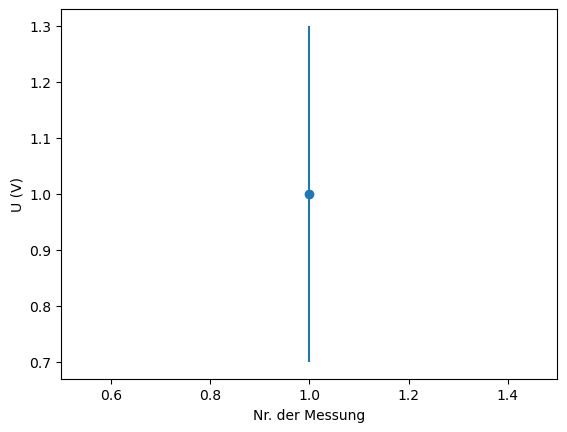

In [6]:
x = [1.0]  # Datenwerte für x-Achse, hier Nr der Messung
y = [1.0]  # Messwert (Datenpunkt)
delta_y = [0.3] # Messabweichung

# Diagrammdarstellung:
plt.errorbar(x, y, yerr=delta_y, fmt='bo', color="tab:blue")
plt.xlim(0.5, 1.5)
#plt.ylim(0.,1.1*(max(y)+max(delta_y)))
plt.ylabel("U (V)")
plt.xlabel("Nr. der Messung")
plt.show()

### Diskrepanz und Konsistenz

Die Diskrepanz zweier Messwerte derselben Größe ist der Absolutbetrag ihrer Differenz. Zwei Messungen sind konsistent, wenn ihre Diskrepanz geringer ist, als die (kleinere der) Messunsicherheiten:
- $g = (9,73 \pm 0,05)\,\mathrm{m/s^2}$ und $g = (9,76 \pm 0,04)\,\mathrm{m/s^2}$ sind *konsistent*, nicht jedoch $g = (9,71 \pm 0,02)\,\mathrm{m/s^2}$ und $g = (9,76 \pm 0,04)\,\mathrm{m/s^2}$
- Ist $g = (8.9 \pm 1,5)\,\mathrm{m/s^2}$ das Ergebnis einer Messung des Ortsfaktors, dann ist die Messung zwar nicht sonderlich präzise, aber mit dem Literaturwert von $g = 9,81\,\mathrm{m/s^2}$ vereinbar.

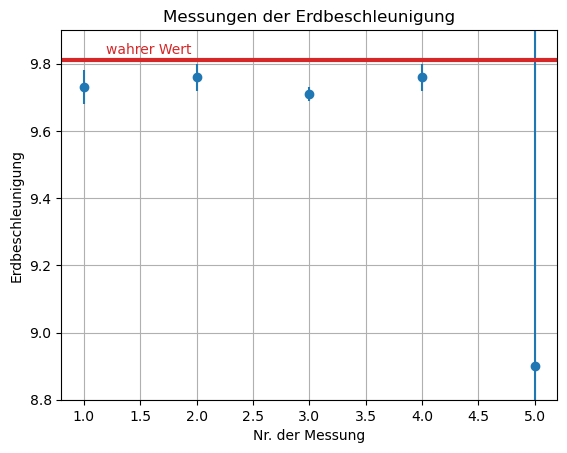

In [7]:
y=[9.73, 9.76, 9.71, 9.76, 8.9] # Messung 
u_y=[0.05,0.04,0.02,0.04,1.5] # Unsicherheit d
y_w=9.81 # wahrer / richtiger Wert 

plt.errorbar([1, 2, 3,4,5], y, yerr=u_y, fmt='bo', color = "tab:blue")

plt.axhline(y_w, color='tab:red', linewidth=3)
plt.text(1.2, 9.83, 'wahrer Wert', color='tab:red') 

plt.ylabel(r"Erdbeschleunigung")
plt.xlabel("Nr. der Messung")
plt.title("Messungen der Erdbeschleunigung")
plt.ylim([8.8,9.9])
plt.grid()
plt.show()

Nur einer der Messwerte überlappt mit dem *wahren* Wert der Erdbeschleunigung Die Fehlerbalken der zweiten Messung hingegen sind davon entfernt, in den *wahren* Bereich überzulappen. D.h. es existiert hier ein Widerspruch zu vorherigen Messungen, die den wahren Wert kennzeichnete. Würde es sich hierbei nicht um die Messung der Erdbeschleunigung, sondern um die einer Natur*konstante* handeln, gäbe es sogar einen Widerspruch zum SI-Einheitensystem. 